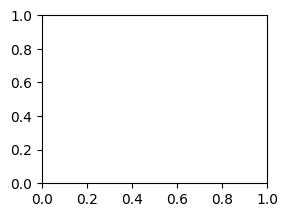

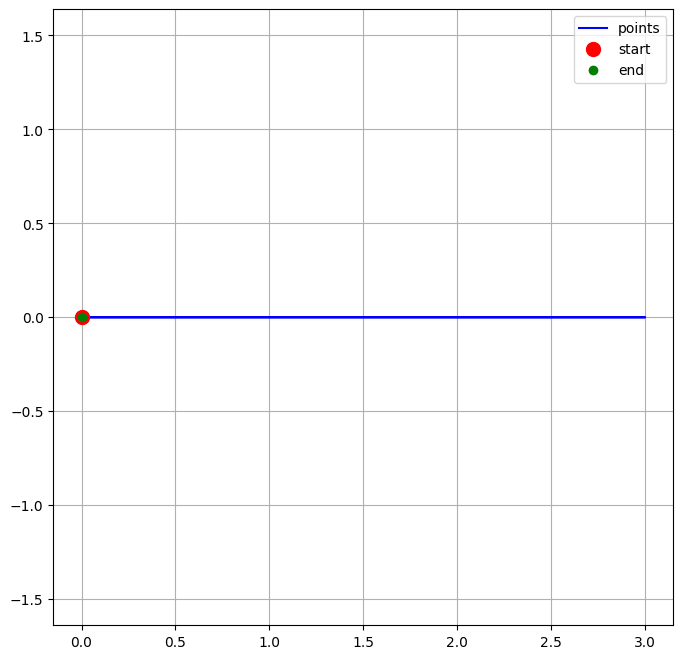

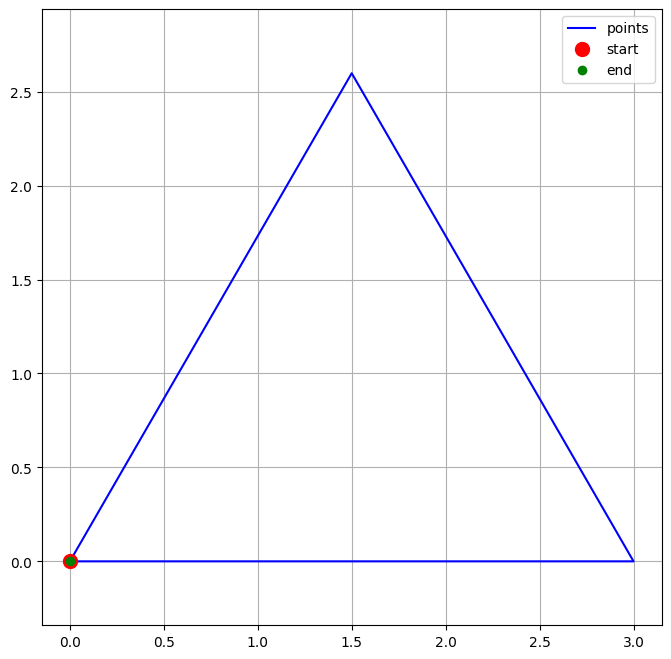

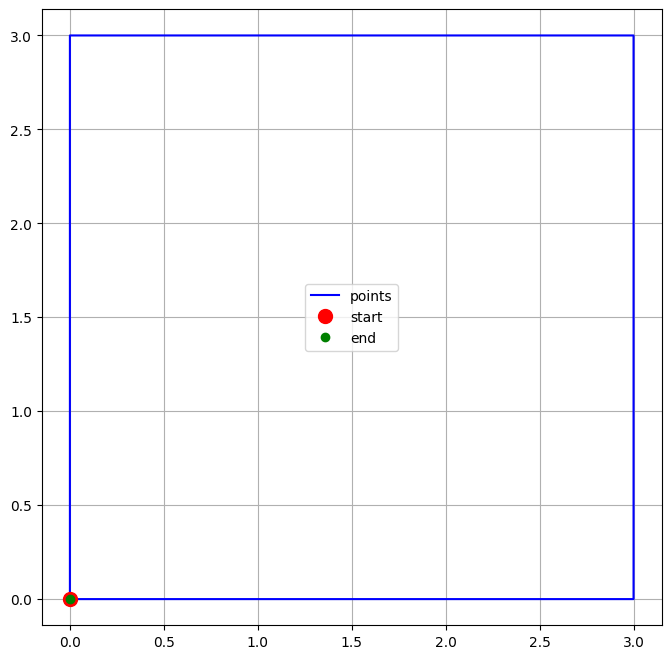

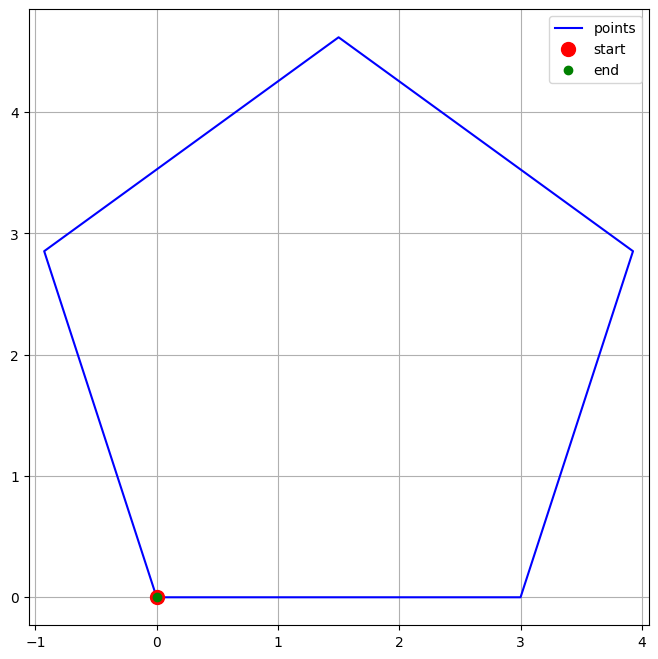

In [55]:
from ast import mod
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import dtype

class Robot:
    def __init__(self, name, x=0, y=0, direct=0, sp=10):
        self.name = name
        self.x = x
        self.y = y
        self.direction = direct
        self.speed = sp
        self.history = [(0, 0)]
        self.dt = 0.001
        self.angular_speed = 0

    def get_position(self):
        return (self.x, self.y)

    def get_direction(self):
        return self.direction

    def get_speed(self):
        return self.speed

    def set_direction(self, new_direction):
        self.direction = new_direction % 360

    def set_speed(self, new_speed):
        self.speed = new_speed

    def info(self):
        return f"{self.name}: позиция ({self.x}, {self.y}), направление {self.direction}°, скорость {self.speed}'' "

    def move_forward(self, distance):
        self.x += distance * math.cos(math.radians(self.direction))
        self.y += distance * math.sin(math.radians(self.direction))
        self.history.append((self.x, self.y))
        #pass

    def turn(self, angle):
        self.direction = (self.direction + angle) % 360
        return self.direction

    def draw_square(self, side_length):
        for i in range(4):
            self.move_forward(side_length)
            self.turn(90)

    def update(self):
        dist = self.dt * self.speed
        turn_angle = self.angular_speed * self.dt
        self.turn(turn_angle)
        self.move_forward(dist)
        pass

    def set_speed(self, new_speed):
        if new_speed > 100:
            self.speed = 100
        elif new_speed < 0:
            self.speed = 0
        else:
            self.speed = new_speed

    def simulate(self, duration):
        n = int(duration / self.dt) 
        for i in range(n):
            self.update()
        pass

    def draw_path(self):
        if len(self.history)-1 == 0:
            print("History is empty")
        else:
            x_coords = [pos[0] for pos in self.history]
            y_coords = [pos[1] for pos in self.history]
        
        plt.figure(figsize=(8, 8))
        plt.plot(x_coords, y_coords, 'b-', label='points')
        plt.plot(x_coords[0], y_coords[0], 'ro', label='start', markersize=10)
        plt.plot(x_coords[-1], y_coords[-1], 'go', label='end')

        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        plt.show()

        pass

    def get_angular_speed(self):
        return self.angular_speed

    def set_angular_speed(self, new_angular_speed):
        if new_angular_speed > 180:
            self.angular_speed = 180
        elif new_angular_speed < -180:
            self.angular_speed = -180
        else:
            self.angular_speed = new_angular_speed

        pass

    def move_in_circle(self, radius, period):
        cir_len = 2 * math.pi * radius
        lin_sp = cir_len / self.dt
        self.set_speed(lin_sp)
        ang_speed = 360 / period
        self.set_angular_speed(ang_speed)

        pass

    def polygon(self, n=5, size=3, sp = 10, ang_sp=60):
        turn_angle = 360 / n
        t_move = size / sp
        t_turn = turn_angle / ang_sp

        for i in range(n):

            self.set_speed(sp)
            self.set_angular_speed(0)
            self.simulate(t_move)
            
            self.set_speed(0)
            self.set_angular_speed(ang_sp)
            self.simulate(t_turn)

        self.set_speed(0)
        self.set_angular_speed(0)
        
        #self.draw_path()

    def some_poly(self):
        for i in range(2, 6):
            self.polygon(n=i)
            x_coords = [pos[0] for pos in self.history]
            y_coords = [pos[1] for pos in self.history]

            plt.figure(figsize=(8, 8))
            plt.plot(x_coords, y_coords, 'b-', label='points')
            plt.plot(x_coords[0], y_coords[0], 'ro', label='start', markersize=10)
            plt.plot(x_coords[-1], y_coords[-1], 'go', label='end')

            plt.grid(True)
            plt.axis('equal')
            plt.legend()
            plt.show()

            self.history = [(0, 0)]

final_robot = Robot("Чемпион")
# final_robot.polygon(n=5)
# final_robot.draw_path()


plt.subplot(2, 2, 1)

final_robot.some_poly()
